## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinded_mouse_df = mouse_metadata.merge(study_results, how='left', on='Mouse ID', sort=False)

final_mouse_df = combinded_mouse_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
final_mouse_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.



In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

In [5]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_grouped = final_mouse_df.groupby(["Drug Regimen"])
regimen_grouped

# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = regimen_grouped["Tumor Volume"].mean()
regimen_median = regimen_grouped["Tumor Volume"].median()
regimen_variance = regimen_grouped["Tumor Volume"].var()
regimen_std = regimen_grouped["Tumor Volume"].std()
regimen_sem = regimen_grouped["Tumor Volume"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Data Points')

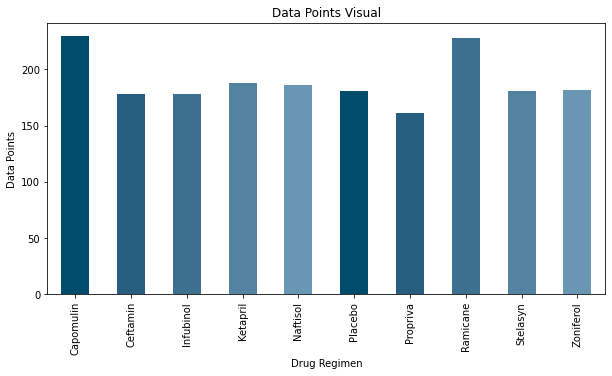

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Color List OF COURSE
my_colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

#Grouping Data by Drug Regimen
regimen_data_points = final_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Creating Chart
regimen_data_points.plot(kind="bar", figsize=(10,5), color=my_colors)

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#Alter the dataframe down to two columns


Text(0, 0.5, 'Data Points')

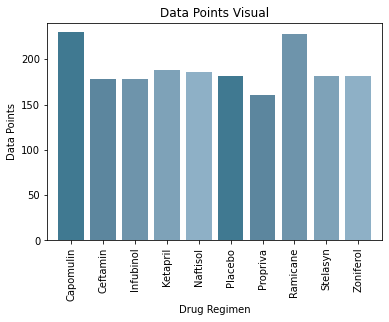

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

#Creating Bar Chart
plt.bar(x_axis, users, color=my_colors, alpha=0.75, align='center')

#Setting Ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

#Setting X and Y Limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+10)

#Titles and Labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


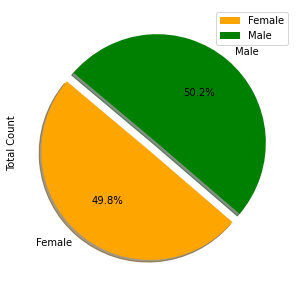

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_gender = final_mouse_df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#Creating Pie Chart
colors = ['orange', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

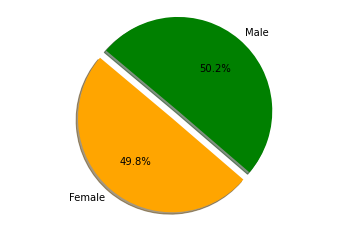

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['orange', 'green']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Calculating the Best Regimens
best_regimes = final_mouse_df[final_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

#Getting a smaller DF to work with
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume"]]

best_regimes_data

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

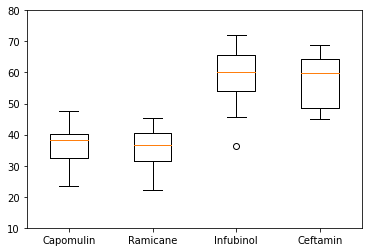

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Grouping by Regimen and Mouse ID 
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

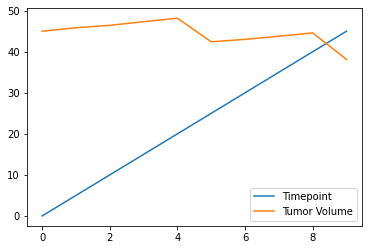

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Creating a variable for time_vs_tumor
time_vs_tumor = final_mouse_df[final_mouse_df["Mouse ID"].isin(["j119"])]
time_vs_tumor

#Creating the DF for the data
time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume"]]
time_vs_tumor_data

#Reseting Index on that Df
line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

#Recreating the DF after reseting the index
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume"]]
line_plot_final

#Plotting line
lines = line_plot_final.plot.line()


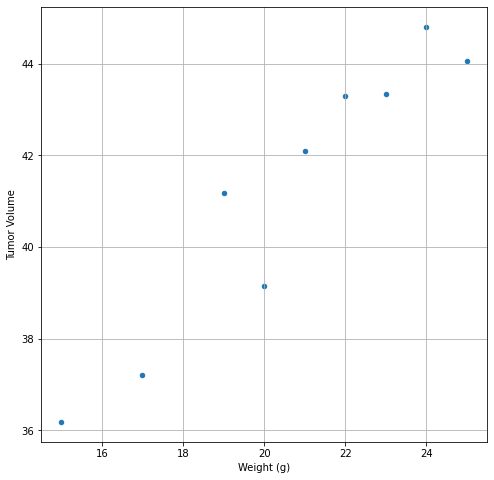

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Creating a variable for capomulin
capomulin_scatter = final_mouse_df[final_mouse_df["Drug Regimen"].isin(["Capomulin"])]

#Creating first DF
capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume"]]

#Sorting the capomulin variable by Weight (g) 
capomulin_sorted = capomulin_scatter_df.sort_values(["Weight (g)"], ascending=True)

#Reseting Index
capomulin_scatter_plot = capomulin_scatter.reset_index()

#Getting the mean from the a groupby of Weight and Tumor Volume
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume"].mean()

#Creating the DF and reseting
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#Plotting
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume', grid = True, figsize= (8,8))


## Correlation and Regression

Text(0.5, 1.0, 'Weight Vs. Avg Tumor Vol')

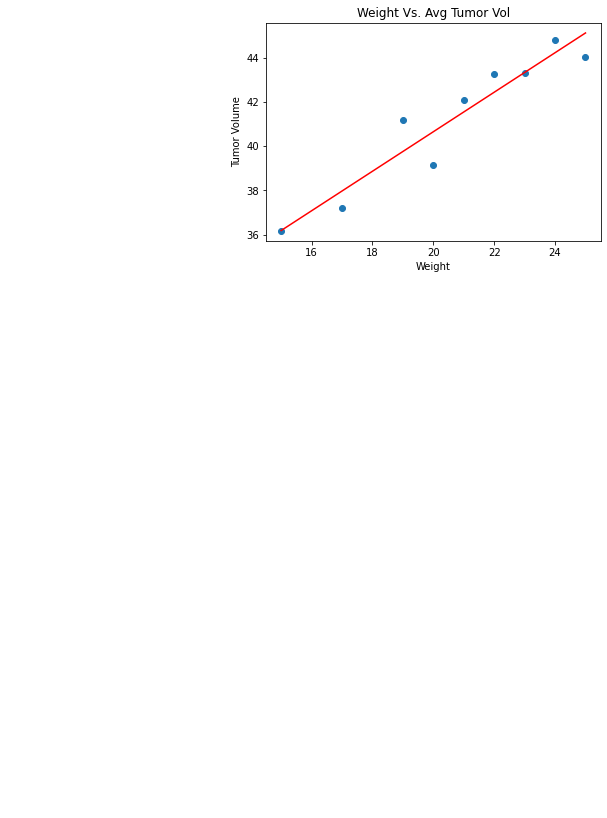

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Creating X & Y values
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#finding regression by x values times the slope and intercept
regress_values = x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#PLotting the Scatter
plt.scatter(x_values, y_values)

#PLotting the line
plt.plot(x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#Titles and Labels
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
